In [1]:
from fluxcomp import GlobalSplineFit as GSFFluxComp

In [6]:
from crflux.models import GlobalSplineFitBeta as GSFCrflux

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
energies = np.geomspace(1e0, 1e11, 1000)

In [9]:
gsf_fc = GSFFluxComp()
gsf_cf = GSFCrflux()

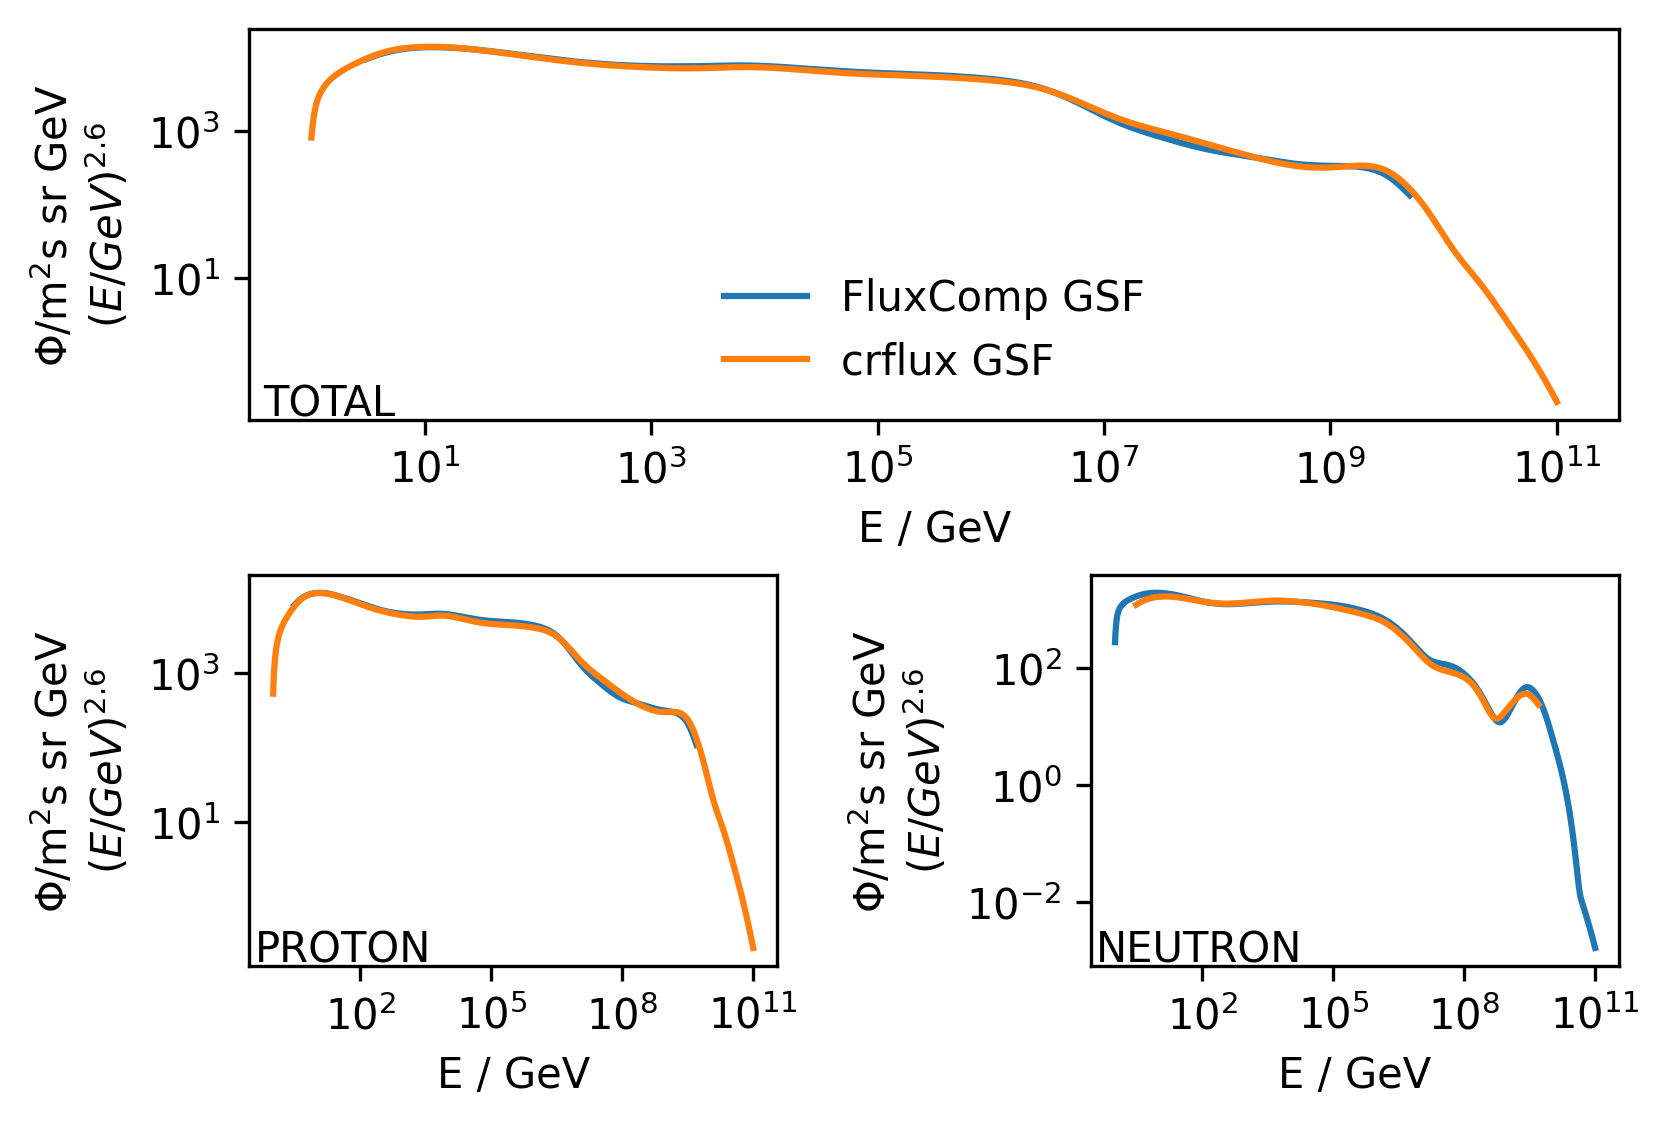

In [89]:
fig, axs = plt.subplot_mosaic(
    [['total', 'total'], ['p', 'n']],
    figsize=(5.45, 3.64),
    dpi=300,
    constrained_layout=True,
)
axs['total'].plot(energies, energies**2.6 * np.sum(gsf_fc.total_p_and_n_flux(energies), axis=0), label='FluxComp GSF')
axs['total'].plot(energies, energies**2.6 * gsf_cf.tot_nucleon_flux(energies), label='crflux GSF')
axs['total'].loglog()
axs['total'].legend(loc='lower center', frameon=False)
axs['total'].text(0.01, 0.01, 'TOTAL', transform=axs['total'].transAxes)
axs['p'].plot(energies, energies**2.6 * gsf_fc.total_p_and_n_flux(energies)[0])
axs['p'].plot(energies, energies**2.6 * gsf_cf.p_and_n_flux(energies)[1])
axs['p'].loglog()
axs['p'].text(0.01, 0.01, 'PROTON', transform=axs['p'].transAxes)
axs['n'].plot(energies, energies**2.6 * gsf_fc.total_p_and_n_flux(energies)[1])
axs['n'].plot(energies, energies**2.6 * gsf_cf.p_and_n_flux(energies)[2])
axs['n'].loglog()
axs['n'].text(0.01, 0.01, 'NEUTRON', transform=axs['n'].transAxes)

for ax in axs:
    axs[ax].set_xlabel('E / GeV')
    axs[ax].set_ylabel(r'$\Phi / \text{m}^2 \text{s sr GeV}$'
                        "\n"
                        r"$(E/GeV)^{2.6}$"
                   )

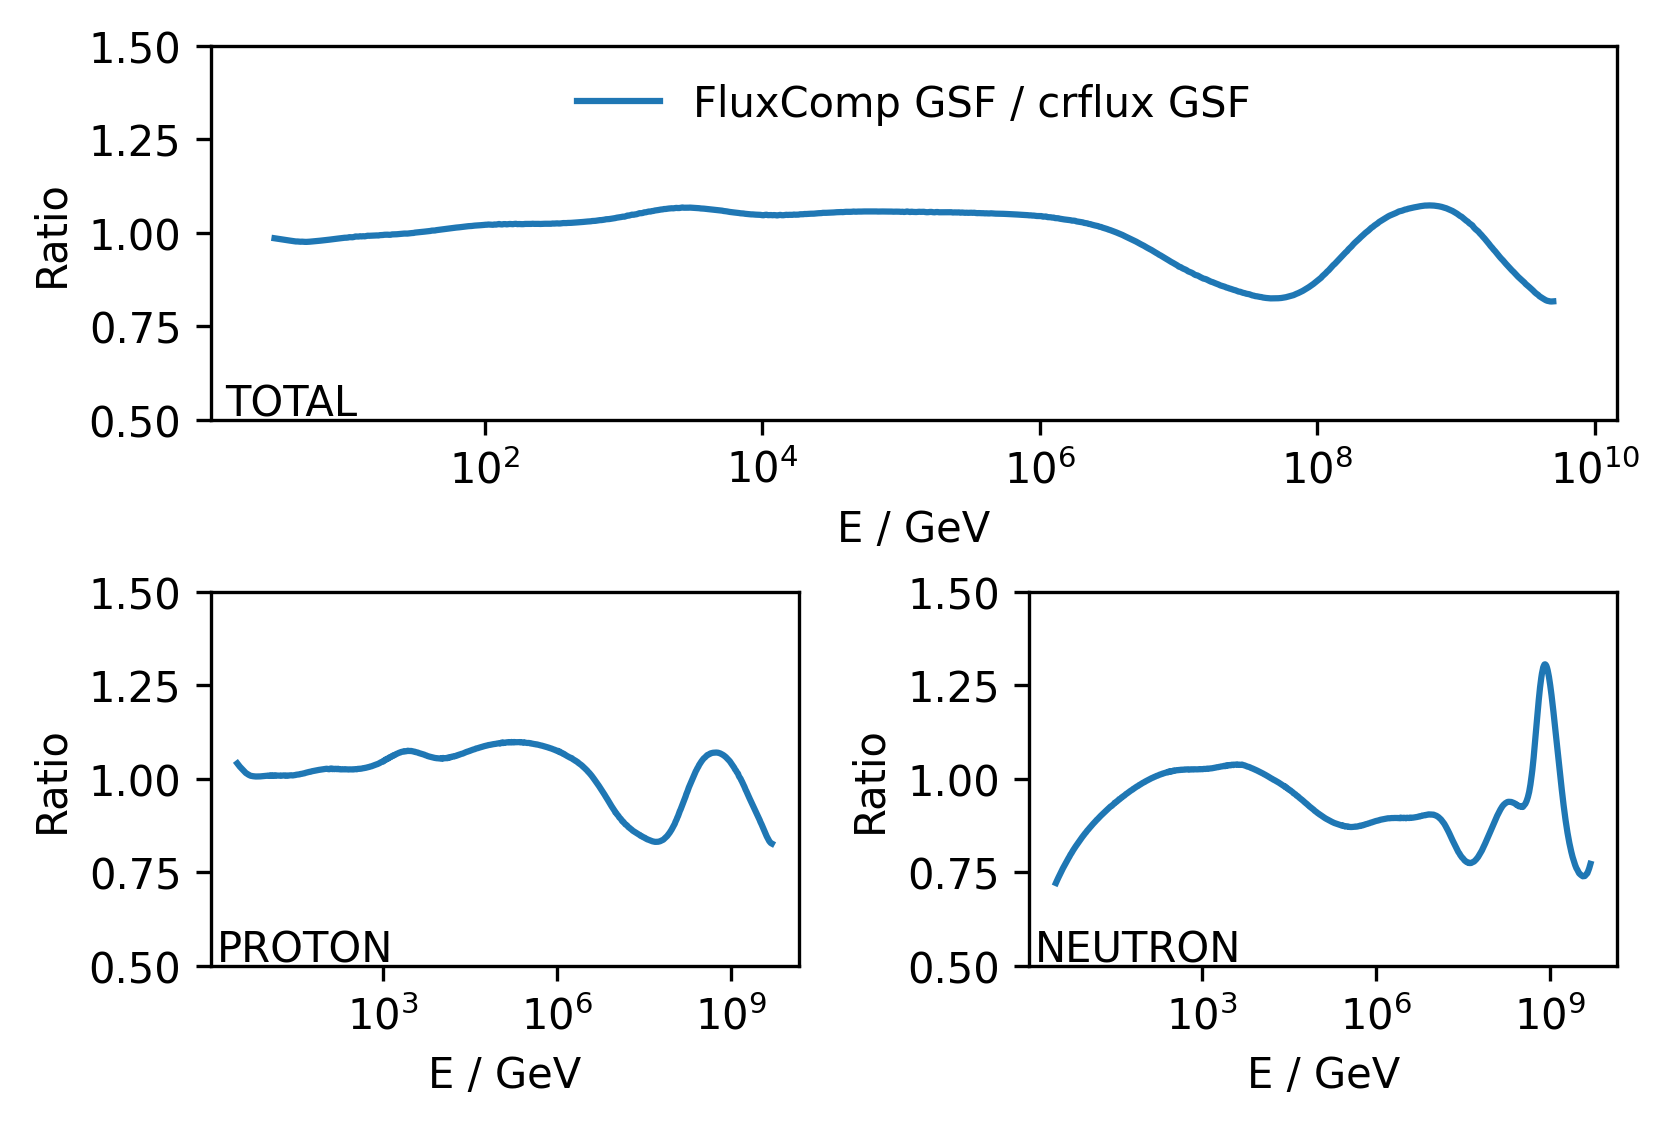

In [96]:
fig, axs = plt.subplot_mosaic(
    [['total', 'total'], ['p', 'n']],
    figsize=(5.45, 3.64),
    dpi=300,
    constrained_layout=True,
)
axs['total'].plot(energies, 
                  np.sum(gsf_fc.total_p_and_n_flux(energies), axis=0) / gsf_cf.tot_nucleon_flux(energies),
                  label='FluxComp GSF / crflux GSF',
             )
axs['total'].semilogx()
axs['total'].legend(loc='upper center', frameon=False)
axs['total'].text(0.01, 0.01, 'TOTAL', transform=axs['total'].transAxes)
axs['p'].plot(energies, gsf_fc.total_p_and_n_flux(energies)[0] / gsf_cf.p_and_n_flux(energies)[1])
axs['p'].semilogx()
axs['p'].text(0.01, 0.01, 'PROTON', transform=axs['p'].transAxes)
axs['n'].plot(energies, gsf_fc.total_p_and_n_flux(energies)[1] / gsf_cf.p_and_n_flux(energies)[2])
axs['n'].semilogx()
axs['n'].text(0.01, 0.01, 'NEUTRON', transform=axs['n'].transAxes)

for ax in axs:
    axs[ax].set_xlabel('E / GeV')
    axs[ax].set_ylabel("Ratio")
    axs[ax].set_ylim(0.5, 1.5)